This code is to test the theoretical calculations and compare it with the results from Teppei's paper 1206.4070
to find the error on large scale of the monopole of $\xi_{dd}^s$.

The error was found from the setting of N parameter inside the Hankel tranform package. This parameter should be large enough to make the integral converge. 

Question:
- what is N?
- which value of N is considered "large enough" to converge?


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DDsmu import DDsmu
from hankel import HankelTransform
from scipy.interpolate import InterpolatedUnivariateSpline as spline 
path = '/Users/ngoc/Desktop/Master-study/project'

In [2]:
#cosmological parameters
z        = 0.306                                #redshift
H_0      = 67                                   #Hubble const
Omg_lamb = 0.685                                #cosmological density parameter
Omg_m    = 1. - Omg_lamb                        #mater density parameter
a        = 1./(1. + z)                          #scale factor
f        = 0.687255861
b        = 3.11                                 #bias for halo b = \delta_halo/\delta_matter
beta     = f/b                                  #linear RSD parameter

#relation between the real and redshift space power spectrum multipoles (Kaiser's coefficients)
K0       = 1 + 2/3*beta + 1/5*beta**2
K2       = 4/3*beta + 4/7*beta**2
K4       = 8/35*beta**2


In [3]:
# loading the power spectrum in realspace (z=0.306)
k   = np.loadtxt(path+'/results/power_spectrum03.txt', usecols = (0))
P   = np.loadtxt(path+'/results/power_spectrum03.txt', usecols = (1))
r   = np.loadtxt(path+'/my-p-code/dd-mono.txt', usecols = (0))
P_k = spline(k, P)


In [4]:

r_dd0_s        = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 0)
xi_dd0_s       = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 1)
error_xi_dd0_s = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_mono.txt', usecols = 2)
xi_dd0_s_lin = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_theory.txt', usecols = 1)

Do the integration by my code, with the multipoles of density auto-correlation in redshift space are given by

$\xi^s_{dd,l} (r) = \frac{i^l}{2 \pi^2} \int_{0}^\infty dk k^2 P_l(k) j_l(kr) $. From that, we can calculate each pole, for example, monopole:
\begin{align}
    \xi^s_0 (r) &= \frac{1}{2 \pi^2} \int_{0}^\infty dk k^2 P_0(k) j_0(kr) \\
                &= \frac{\Delta k}{2 \pi^2} \sum_{i=1}^{n} k_i^2 P_0(k_i) j_0(k_ir)\\
 \end{align}       
with n is the number of bins, which is large enough (how large is enough?).

We have P(k) within the range k = (10^{-4}, 10^2). I choose the $\Delta k = 10^{-4}$, and number of bins is $10^6$, that means every bin has the size of $\Delta k \approx 10^{-4}$


results from theory F-corrfunc code

In [5]:
xi_f = np.loadtxt(path+'/my-f-code/results/xi-dd0-th.txt', usecols=(1))
xi_f *= K0*b**2
xi_f2 = np.loadtxt(path+'/my-f-code/results/xi-dd2-th.txt', usecols=(1))
xi_f2 *= K2*b**2

In [6]:
print(xi_f)

[ 4.44281777e+01  3.86942176e+01  3.42986238e+01  3.03954850e+01
  2.67945020e+01  2.34951434e+01  2.04654125e+01  1.78078590e+01
  1.53863459e+01  1.32134517e+01  1.12929649e+01  9.58637376e+00
  8.08564070e+00  6.76677333e+00  5.62061782e+00  4.63074684e+00
  3.78023963e+00  3.05930967e+00  2.44938310e+00  1.94168970e+00
  1.52025010e+00  1.17635947e+00  8.98121796e-01  6.75953183e-01
  5.01114794e-01  3.64846178e-01  2.60778472e-01  1.82378635e-01
  1.24456296e-01  8.24763736e-02  5.27180765e-02  3.21751154e-02
  1.82218225e-02  8.60512798e-03  6.38485072e-03  1.42514197e-02
  2.38964713e-03 -2.63042928e-03 -2.72636928e-03 -2.02475336e-03
 -1.36159005e-03 -9.44807400e-04 -5.91902128e-04 -3.69145192e-04
 -2.30325357e-04 -1.44274306e-04 -8.91281220e-05 -5.45840733e-05
 -3.37410043e-05 -2.00061587e-05]


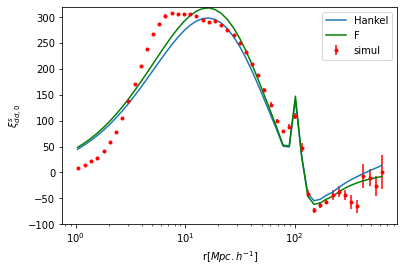

In [7]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(r_dd0_s,xi_dd0_s_lin*r_dd0_s**2, label='Hankel')
ax.plot(r, xi_f*r**2,'g-' ,label = 'F')
ax.errorbar(r_dd0_s,  xi_dd0_s*r_dd0_s**2, fmt = 'r.', yerr = error_xi_dd0_s*r_dd0_s**2, label ='simul')
ax.set_ylabel("$\\xi_{dd,0}^s$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.set_ylim(-100,320)
ax.legend()
#plt.savefig('num_check0.png')

In [8]:

r_dd2_s        = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 0)
xi_dd2_s       = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 1)
error_xi_dd2_s = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_quad.txt', usecols = 2)
xi_dd2_s_lin3000   = np.loadtxt(path+'/my-p-code/xi_dd_redshiftspace_theory.txt', usecols = 2)

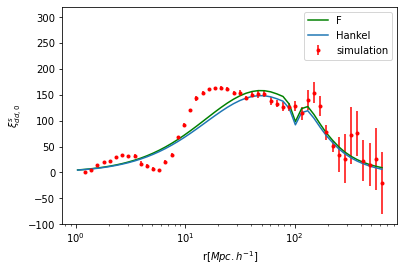

In [9]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(r, -xi_f2*r**2,'g-', label='F')
ax.plot(r_dd2_s,-xi_dd2_s_lin3000*r_dd2_s**2, '-', label='Hankel')
ax.errorbar(r_dd2_s,  -xi_dd2_s*r_dd0_s**2, fmt = 'r.', yerr = error_xi_dd2_s*r_dd2_s**2, label ='simulation')
ax.set_ylabel("$\\xi_{dd,0}^s$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.set_ylim(-100,320)
ax.legend()
#ax.grid('on')
#plt.savefig('num_check2.png')

For the velocity auto-correlation function in real space

The monopole is
$ \xi_{vv,0}(r) =  (afH)^2 \frac{1}{3}\int \frac{dk}{2\pi^2} P(k) j_0(kr),$

and the quadrupole is
$\xi_{vv,2}(r) =  \frac{-2}{3}  (afH)^2 \frac{1}{2\pi^2} \int dk P(k)j_2(kr)$

In [10]:
xi_vv0_lin3000   = np.loadtxt(path+'/my-p-code/xi_vv_realspace_theory.txt', usecols = 1)
xi_vv2_lin3000   = np.loadtxt(path+'/my-p-code/xi_vv_realspace_theory.txt', usecols = 2)

In [11]:
xi_vv0 = np.loadtxt(path+'/my-f-code/results/xi-vv0-th-test.txt', usecols=(1))
xi_vv0 *= f**2/3
xi_vv2 = np.loadtxt(path+'/my-f-code/results/xi-vv2-th-test.txt', usecols=(1))
xi_vv2 *= -2/3*f**2

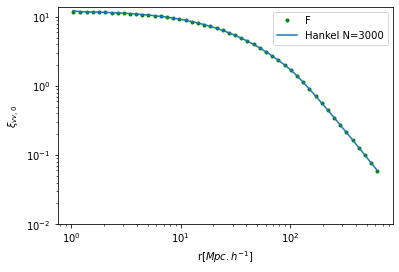

In [12]:
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(r,xi_vv0,'g.', label='F')
ax.plot(r,xi_vv0_lin3000, '-',label='Hankel N=3000')
#ax.errorbar(r_vv0,  xi_vv0, fmt = 'r.', yerr = error_xi_vv0, label ='simulation')
ax.set_ylabel("$\\xi_{vv,0}$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.set_ylim(1e-2,14)
ax.legend()
#plt.savefig('num_check_vv0.png')

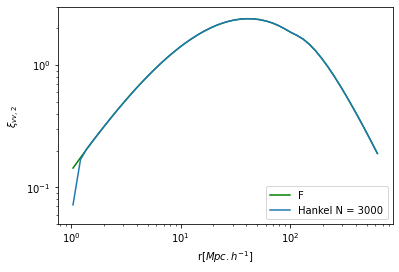

In [13]:
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(r, -xi_vv2,'g-', label='F')
ax.plot(r, -xi_vv2_lin3000, '-',label='Hankel N = 3000')
#ax.errorbar(r_vv2,  -xi_vv2, fmt = 'r.', yerr = error_xi_vv2, label ='simulation')
ax.set_ylabel("$\\xi_{vv,2}$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.set_ylim(5e-2,3)
ax.legend()
#plt.savefig('num_check_vv2.png')

2. Using the package Hankel

The Hankel transform has the form 
$F(k) = \int_0^\infty f(r) J_n(kr) r dr$

and the inverse Hankel transform is
$f(r) = \int_0^\infty F(k) J_n(kr) k dk$

with the relation between spherical bessel function $j$ and Bessel function of the first kind $J$ is
$j_n(kr) = \sqrt{\frac{\pi}{2 kr}} J_{n+\frac{1}{2}}(kr)$


Teppei's suggestion: plot the bessel function as the function of k, $j_0(k_i r) = \frac{\sin(k_i r)}{k_i r}$, at r = 200


To test the differences between the outputs of Hankel transform in different values of N, I plot the function $\int j_0(kr) dk$. The default function in Hankel is $\int f(k) J_\nu (kr) r dk$, so, to get $\int j_0(kr) dk$, the function $f(k) = \sqrt{\frac{\pi}{2k}}\frac{1}{r^{3/2}} $. I plot the hankel transform of that function for different values of N, from 1000 to $\pi/h$


Some thoughts about the plot of $\int j_0(kr) dk$:
- The "correct" value is defined using the O5 method, that is $N = \frac{\pi}{h}$
- why do the plot of different N values fluctuate around the "correct" one?
The difference happens only on small scale, not on large scale, then which one cause the difference on large scale of the correlation function?

- do they use the shooting method for finding the right value of integral?

- Let try plot with $\int j_0(kr) P(k) dk$ (or $\int J_{1/2}(kr) P(k) dk$)

- The plot shows difference between different values of N, it's here!

- The Hankel code applies the O5 method to calculate the Hankel transform with using the roots of Bessel function (converge 2x faster than normal trapezodial method):

$\int f(k) J_\nu(kr) dk = \pi \sum_i \omega(h \epsilon) J(\epsilon) $

- If we express the correlation function $\xi$ follow that form, it becomes
$$

=> conclusion: the different values of N affect on the Power spectrum $P(k)$, not on the Bessel function $j_0(k)$. 

The monopole of density auto-correlation in redshift space $\xi_{dd,0}^s$

The N parameter in Hankel code is not the number of k(or r) bins. The number of bins can be specified by the binsize $h$. N is the number of Bessel's zeros. Based on Ogata 2005, N affects the convergence of the function. Therefore, increasing N to the higher number (from N = 2000 to N = 3000 in the $\xi_{dd,0}^s$) makes the function converge. (detail?) 

In [14]:
#monopole
f_0  = lambda k: P_k(k)*np.sqrt(k)/(np.pi*2)**(3/2)

In [15]:
#define all the values of N in the Hankel transform
h0_2000 = HankelTransform(nu = 1/2, N = 2000, h = 1e-5)
h0_3000 = HankelTransform(nu = 1/2, N = 3000, h = 1e-5)
h0_4000 = HankelTransform(nu = 1/2, N = 4000, h = 1e-5)
h0_5000 = HankelTransform(nu = 1/2, N = 5000, h = 1e-5)
h0_6000 = HankelTransform(nu = 1/2, N = 6000, h = 1e-5)
h0_7000 = HankelTransform(nu = 1/2, N = 7000, h = 1e-5)
h0_8000 = HankelTransform(nu = 1/2, N = 8000, h = 1e-5)
h0_9000 = HankelTransform(nu = 1/2, N = 9000, h = 1e-5)
h0_1e4  = HankelTransform(nu = 1/2, N = 10000, h = 1e-5)
h0_pi   = HankelTransform(nu = 1/2, N = 314000, h = 1e-5)

In [16]:

xi_dd0_2000 = 1/np.sqrt(r)*h0_2000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_3000 = 1/np.sqrt(r)*h0_3000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_4000 = 1/np.sqrt(r)*h0_4000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_5000 = 1/np.sqrt(r)*h0_5000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_6000 = 1/np.sqrt(r)*h0_6000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_7000 = 1/np.sqrt(r)*h0_7000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_8000 = 1/np.sqrt(r)*h0_8000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_9000 = 1/np.sqrt(r)*h0_9000.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_1e4  = 1/np.sqrt(r)*h0_1e4.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2
xi_dd0_pi   = 1/np.sqrt(r)*h0_pi.transform(f_0,r, ret_err=False, inverse=True)*K0*b**2

(-60.0, 600.0)

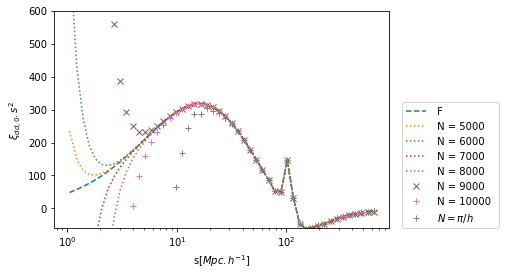

In [17]:
#the xi_dd^s with different values of N of Hankel transform

plt.semilogx(r, xi_f*r**2, '--', label =" F ")
#plt.semilogx(r, xi_dd0_2000*r**2, ':', label =" N = 2000 ")
#plt.semilogx(r, xi_dd0_3000*r**2, 'x', label =" N = 3000 ")
#plt.semilogx(r, xi_dd0_4000*r**2, '.', label =" N = 4000 ")
plt.semilogx(r, xi_dd0_5000*r**2, ':', label =" N = 5000 ")
plt.semilogx(r, xi_dd0_6000*r**2, ':', label =" N = 6000 ")
plt.semilogx(r, xi_dd0_7000*r**2, ':', label =" N = 7000 ")
plt.semilogx(r, xi_dd0_8000*r**2, ':', label =" N = 8000 ")
plt.semilogx(r, xi_dd0_9000*r**2, 'x', label =" N = 9000 ")
plt.semilogx(r, xi_dd0_1e4*r**2, '+', label =" N = 10000 ")
plt.semilogx(r, xi_dd0_pi*r**2, '+', label =" $N = \pi/h$ ")

plt.xlabel('s$ [Mpc.h^{-1}]$')
plt.ylabel('$\\xi_{dd,0}. s^2$')
plt.legend(loc=(1.04,0))
#plt.xlim(200,)
plt.ylim(-60,600)
#plt.savefig("N-different_2.png")

(0.5, 1.5)

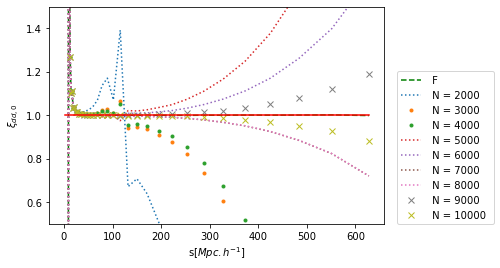

In [18]:
#the xi_dd^s with different values of N of Hankel transform
y = np.full_like(r,1)
plt.plot(r, xi_f/xi_dd0_pi, 'g--', label =" F ")
plt.plot(r, xi_dd0_2000/xi_dd0_pi, ':', label =" N = 2000 ")
plt.plot(r, xi_dd0_3000/xi_dd0_pi, '.', label =" N = 3000 ")
plt.plot(r, xi_dd0_4000/xi_dd0_pi, '.', label =" N = 4000 ")
plt.plot(r, xi_dd0_5000/xi_dd0_pi, ':', label =" N = 5000 ")
plt.plot(r, xi_dd0_6000/xi_dd0_pi, ':', label =" N = 6000 ")
plt.plot(r, xi_dd0_7000/xi_dd0_pi, ':', label =" N = 7000 ")
plt.plot(r, xi_dd0_8000/xi_dd0_pi, ':', label =" N = 8000 ")
plt.plot(r, xi_dd0_9000/xi_dd0_pi, 'x', label =" N = 9000 ")
plt.plot(r, xi_dd0_1e4/xi_dd0_pi, 'x', label =" N = 10000 ")
plt.plot(r,y,'r-')
plt.xlabel('s$ [Mpc.h^{-1}]$')
plt.ylabel('$\\xi_{dd,0}$')
plt.legend(loc=(1.04,0))
#plt.xlim(1,)
plt.ylim(0.5,1.5)
#plt.savefig("N-different_2.png")

for $\xi_{vv}^2(r)$

In [19]:
#define all the values of N in the Hankel transform
h2_2000 = HankelTransform(nu = 5/2, N = 2000, h = 1e-5)
h2_3000 = HankelTransform(nu = 5/2, N = 3000, h = 1e-5)
h2_4000 = HankelTransform(nu = 5/2, N = 4000, h = 1e-5)
h2_5000 = HankelTransform(nu = 5/2, N = 5000, h = 1e-5)
h2_6000 = HankelTransform(nu = 5/2, N = 6000, h = 1e-5)
h2_7000 = HankelTransform(nu = 5/2, N = 7000, h = 1e-5)
h2_8000 = HankelTransform(nu = 5/2, N = 8000, h = 1e-5)
h2_9000 = HankelTransform(nu = 5/2, N = 9000, h = 1e-5)
h2_1e4  = HankelTransform(nu = 5/2, N = 10000, h = 1e-5)
h2_pi   = HankelTransform(nu = 5/2, N = 314000, h = 1e-5)

In [20]:
f2  = lambda kk: P_k(kk)/(kk*np.pi*2)**(3/2)

In [21]:

xi_vv2_2000 = 1/np.sqrt(r)*h2_2000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_3000 = 1/np.sqrt(r)*h2_3000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_4000 = 1/np.sqrt(r)*h2_4000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_5000 = 1/np.sqrt(r)*h2_5000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_6000 = 1/np.sqrt(r)*h2_6000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_7000 = 1/np.sqrt(r)*h2_7000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_8000 = 1/np.sqrt(r)*h2_8000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_9000 = 1/np.sqrt(r)*h2_9000.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_1e4  = 1/np.sqrt(r)*h2_1e4.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)
xi_vv2_pi   = 1/np.sqrt(r)*h2_pi.transform(f2,r, ret_err=False, inverse=True)*(-2/3*f**2)


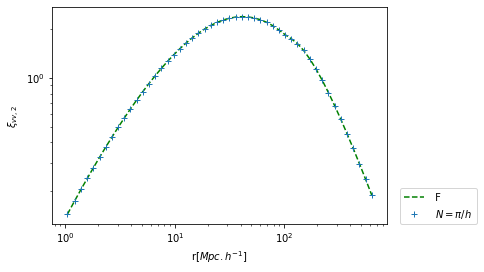

In [22]:
#the xi_dd^s with different values of N of Hankel transform
plt.loglog(r, -xi_vv2, 'g--', label =" F")
#plt.loglog(r, -xi_vv2_2000, ':', label =" N = 2000 ")
#plt.plot(r, -xi_vv2_3000, '--', label =" N = 3000 ")
#plt.plot(r, -xi_vv2_4000, '.', label =" N = 4000 ")
#plt.plot(r, -xi_vv2_5000, ':', label =" N = 5000 ")
#plt.plot(r, -xi_vv2_6000, ':', label =" N = 6000 ")
#plt.plot(r, -xi_vv2_7000, ':', label =" N = 7000 ")
#plt.plot(r, -xi_vv2_8000, ':', label =" N = 8000 ")
#plt.plot(r, -xi_vv2_9000, '.', label =" N = 9000 ")
#plt.plot(r, -xi_vv2_1e4, '--', label =" N = 10000 ")
plt.plot(r, -xi_vv2_pi, '+', label =" $N = \pi/h$ ")

plt.xlabel('r$ [Mpc.h^{-1}]$')
plt.ylabel('$\\xi_{vv,2}$')
plt.legend(loc=(1.04,0))
#plt.xlim(10,200)
#plt.ylim(1,3)
#plt.savefig("N-different_2.png")

(0.9999, 1.00005)

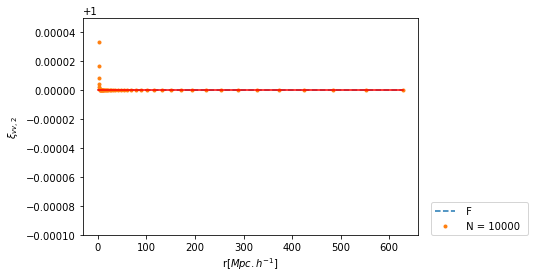

In [23]:
#the xi_dd^s with different values of N of Hankel transform

y = np.full_like(r,1)
plt.plot(r, xi_vv2/xi_vv2_pi, '--', label =" F")

#plt.plot(r, xi_vv2_2000/xi_vv2_pi, ':', label =" N = 2000 ")
#plt.plot(r, xi_vv2_3000/xi_vv2_pi, '.', label =" N = 3000 ")
#plt.plot(r, xi_vv2_4000/xi_vv2_pi, '.', label =" N = 4000 ")
#plt.plot(r, xi_vv2_5000/xi_vv2_pi, ':', label =" N = 5000 ")
#plt.plot(r, xi_vv2_6000/xi_vv2_pi, ':', label =" N = 6000 ")
#plt.plot(r, xi_vv2_7000/xi_vv2_pi, ':', label =" N = 7000 ")
#plt.plot(r, xi_vv2_8000/xi_vv2_pi, ':', label =" N = 8000 ")
#plt.plot(r, xi_vv2_9000/xi_vv2_pi, '.', label =" N = 9000 ")
plt.plot(r, xi_vv2_1e4/xi_vv2_pi, '.', label =" N = 10000 ")
plt.plot(r,y,'r-')

plt.xlabel('r$ [Mpc.h^{-1}]$')
plt.ylabel('$\\xi_{vv,2}$')
plt.legend(loc=(1.04,0))
#plt.xlim(10,200)
plt.ylim(0.9999,1.00005)
#plt.savefig("N-different_2.png")

In [24]:
# test the 3 output files I used for Power spectrum (the reason why I had different results for xi)
# the file matter_Pk.txt use A_s as input so it shows the difference compare to other 2 files
# conclusion: use the other 2 files (their input is sigma8, which is the same with Teppei's paper)

k_test = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (0))
k_test2= np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (0))
P_test = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (1))
P_test2= np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (1))
P_1000   = np.loadtxt(path+'/results/power_spectrum03_1000.txt', usecols = (1))
P_2000   = np.loadtxt(path+'/results/power_spectrum03_2000.txt', usecols = (1))

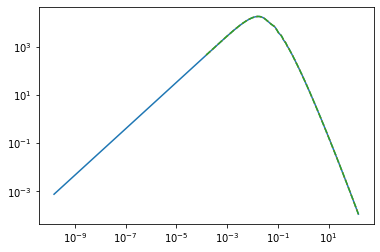

In [25]:
plt.loglog(k,P,label ='p03,s8')
plt.plot(k_test,P_test, ':',label='test')
plt.plot(k_test2,P_test2,'--',label='test2')

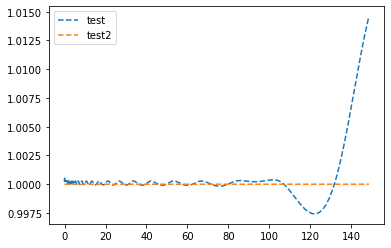

In [26]:
plt.plot(k_test,P_test/P_1000, '--',label='test')
plt.plot(k_test2,P_test2/P_2000,'--',label='test2')
plt.legend()